In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
GOOGLE_DRIVE_BASE_PATH = "/content/drive/MyDrive/"
user = "Matthew" # change before running the notebook

if user == "Julia":
    DATA_PATH = GOOGLE_DRIVE_BASE_PATH + "..." + "data/"
elif user == "Matthew":
    DATA_PATH = "/Users/mdong/dataScience/projects-ml/ca-waste/" + "data/"
#     DATA_PATH = GOOGLE_DRIVE_BASE_PATH + "Sustainability/ER131-Project/" + "data/"
elif user == "Samadi":
    DATA_PATH = GOOGLE_DRIVE_BASE_PATH + "..." + "data/"
elif user == "Shaye":
    DATA_PATH = GOOGLE_DRIVE_BASE_PATH + "..." + "data/"
    
print("User: {}\nPath to data: {}".format(user, DATA_PATH))

User: Matthew
Path to data: /Users/mdong/dataScience/projects-ml/ca-waste/data/


## Load in data

In [4]:
complete_feature_df = pd.read_csv(DATA_PATH + "complete_feature_df.csv")
complete_feature_df.head()

,Year,Waste Produced (Tons),County,Population,Electricity Usage (GWh)
0,2000.0,1676429.25,Alameda,1443939.0,2926.106226
1,2000.0,745.00,Alpine,1208.0,6.247035
2,2000.0,41059.90,Amador,35100.0,127.238094
3,2000.0,203896.87,Butte,203171.0,705.766172
4,2000.0,34110.44,Calaveras,40554.0,173.578409


In [5]:
complete_feature_df.set_index("Year", inplace=True)
complete_feature_df.head(3)

,Waste Produced (Tons),County,Population,Electricity Usage (GWh)
Year,,,,
2000.0,1676429.25,Alameda,1443939.0,2926.106226
2000.0,745.00,Alpine,1208.0,6.247035
2000.0,41059.90,Amador,35100.0,127.238094


In [6]:
# x = pd.to_datetime(complete_feature_df['Year'], format='%Y')
# type(x[0].year)

## Feature, target split

In [7]:
target = complete_feature_df[["Waste Produced (Tons)"]]
feature_df = complete_feature_df.drop(columns="Waste Produced (Tons)")
feature_df.head(2)

,County,Population,Electricity Usage (GWh)
Year,,,
2000.0,Alameda,1443939.0,2926.106226
2000.0,Alpine,1208.0,6.247035


In [8]:
target.head(2)

,Waste Produced (Tons)
Year,
2000.0,1676429.25
2000.0,745.00


## Preprocessing

### One hot encoding


In [9]:
feature_df = pd.get_dummies(feature_df, columns=["County"])
feature_df.head()

,Population,Electricity Usage (GWh),County_Alameda,County_Alpine,County_Amador,County_Butte,County_Calaveras,County_Colusa,County_Contra Costa,County_Del Norte,...,County_Solano,County_Sonoma,County_Stanislaus,County_Tehama,County_Trinity,County_Tulare,County_Tuolumne,County_Ventura,County_Yolo,County_Yuba
Year,,,,,,,,,,,,,,,,,,,,,
2000.0,1443939.0,2926.106226,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000.0,1208.0,6.247035,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000.0,35100.0,127.238094,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000.0,203171.0,705.766172,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000.0,40554.0,173.578409,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# from sklearn.preprocessing import OneHotEncoder

# one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
# one_hot_encoder.fit(X_train)

# X_train = one_hot_encoder.transform(X_train)
# X_test = one_hot_encoder.transform(X_test)

# one_hot_encoder.categories_
# X_train
# <1073x2190 sparse matrix of type '<class 'numpy.float64'>'
# with 3219 stored elements in Compressed Sparse Row format>

### TODO: Scaling

## Train test split

In [11]:
feature_df.head()

,Population,Electricity Usage (GWh),County_Alameda,County_Alpine,County_Amador,County_Butte,County_Calaveras,County_Colusa,County_Contra Costa,County_Del Norte,...,County_Solano,County_Sonoma,County_Stanislaus,County_Tehama,County_Trinity,County_Tulare,County_Tuolumne,County_Ventura,County_Yolo,County_Yuba
Year,,,,,,,,,,,,,,,,,,,,,
2000.0,1443939.0,2926.106226,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000.0,1208.0,6.247035,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000.0,35100.0,127.238094,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000.0,203171.0,705.766172,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000.0,40554.0,173.578409,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X_train, y_train = feature_df.loc[feature_df.index!=2019], target[target.index!=2019]
X_test, y_test = feature_df.loc[feature_df.index==2019], target[target.index==2019]

In [13]:
X_train.head(2)

,Population,Electricity Usage (GWh),County_Alameda,County_Alpine,County_Amador,County_Butte,County_Calaveras,County_Colusa,County_Contra Costa,County_Del Norte,...,County_Solano,County_Sonoma,County_Stanislaus,County_Tehama,County_Trinity,County_Tulare,County_Tuolumne,County_Ventura,County_Yolo,County_Yuba
Year,,,,,,,,,,,,,,,,,,,,,
2000.0,1443939.0,2926.106226,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000.0,1208.0,6.247035,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
y_train.head(2)

,Waste Produced (Tons)
Year,
2000.0,1676429.25
2000.0,745.00


In [15]:
assert 2019 not in X_train.index.unique(), "2019 should not be in the training data"
assert 2019 not in y_train.index.unique(), "2019 should not be in the training data"

assert 2019 == X_test.index.unique(), "2019 should be the test data"
assert 2019 == y_test.index.unique(), "2019 should be the test data"

# Prediction question 1: Model selection training on the entire dataset

## Linear regression methods

## Decision tree ensemble method

- Note: Decision trees are supposed to be able to handle categorical features but this is [not supported in sklearn](https://stackoverflow.com/questions/38108832/passing-categorical-data-to-sklearn-decision-tree) so we need to one hot encode

In [16]:
def root_mean_squared_error(actual, predicted):
    """Creating RMSE function since it's not inbuilt in sklearn
    """
    return np.sqrt(mean_squared_error(actual, predicted))

rmse = make_scorer(root_mean_squared_error, greater_is_better = False)

In [17]:
random_forest_model = RandomForestRegressor()

possible_hyperparams = { 
    'n_estimators': [10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,10)]
}

grid_search = GridSearchCV(estimator=random_forest_model, param_grid=possible_hyperparams, cv=5, scoring=rmse)

In [18]:
grid_search.fit(X_train, y_train.values.ravel()) # need to call this ravel function because of https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
best_score = -grid_search.best_score_ # needs to be negated because of https://stackoverflow.com/questions/21443865/scikit-learn-cross-validation-negative-values-with-mean-squared-error
best_model = grid_search.best_estimator_


/Users/mdong/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [19]:
best_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [20]:
y_pred = best_model.predict(X_test)

In [21]:
root_mean_squared_error(y_test, y_pred)

277885.248253136

In [22]:
r2_score(y_test, y_pred)

0.9694866020041117

In [23]:
X_test.head(2)

,Population,Electricity Usage (GWh),County_Alameda,County_Alpine,County_Amador,County_Butte,County_Calaveras,County_Colusa,County_Contra Costa,County_Del Norte,...,County_Solano,County_Sonoma,County_Stanislaus,County_Tehama,County_Trinity,County_Tulare,County_Tuolumne,County_Ventura,County_Yolo,County_Yuba
Year,,,,,,,,,,,,,,,,,,,,,
2019.0,1664783.0,3064.781376,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019.0,1149.0,10.131788,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


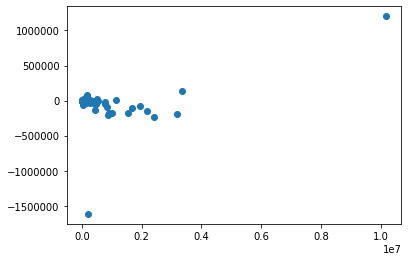

In [45]:
residuals = y_pred.reshape(57,1) - y_test.values
plt.scatter(X_test.Population, residuals)

## predict on entire dataset

In [46]:
best_model.fit(feature_df, target.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [47]:
len(feature_df)

1130

In [48]:
feature_df.head(2)

,Population,Electricity Usage (GWh),County_Alameda,County_Alpine,County_Amador,County_Butte,County_Calaveras,County_Colusa,County_Contra Costa,County_Del Norte,...,County_Solano,County_Sonoma,County_Stanislaus,County_Tehama,County_Trinity,County_Tulare,County_Tuolumne,County_Ventura,County_Yolo,County_Yuba
Year,,,,,,,,,,,,,,,,,,,,,
2000.0,1443939.0,2926.106226,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000.0,1208.0,6.247035,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
complete_feature_df.head(2)

,Waste Produced (Tons),County,Population,Electricity Usage (GWh)
Year,,,,
2000.0,1676429.25,Alameda,1443939.0,2926.106226
2000.0,745.00,Alpine,1208.0,6.247035


In [50]:
complete_feature_df["Predicted Waste Produced"] = best_model.predict(feature_df)
complete_feature_df.head(3)

,Waste Produced (Tons),County,Population,Electricity Usage (GWh),Predicted Waste Produced
Year,,,,,
2000.0,1676429.25,Alameda,1443939.0,2926.106226,1.619786e+06
2000.0,745.00,Alpine,1208.0,6.247035,1.449048e+03
2000.0,41059.90,Amador,35100.0,127.238094,2.260273e+04


In [51]:
complete_feature_df.reset_index(inplace=True)
complete_feature_df.rename(columns={"Waste Produced (Tons)": "Observed Waste Produced"}, inplace=True)
predictions_observations = complete_feature_df[["Year", "County", "Observed Waste Produced", "Predicted Waste Produced"]]
predictions_observations.head()

,Year,County,Observed Waste Produced,Predicted Waste Produced
0,2000.0,Alameda,1676429.25,1.619786e+06
1,2000.0,Alpine,745.00,1.449048e+03
2,2000.0,Amador,41059.90,2.260273e+04
3,2000.0,Butte,203896.87,1.987874e+05
4,2000.0,Calaveras,34110.44,3.668738e+04


In [52]:
predictions_observations.to_csv(DATA_PATH + "predictions_observations.csv", index=False)

# Prediction question 2: Forecasting waste production into the future

In [53]:
average_waste_produced = 1.388987e+06
years_to_predict = np.arange(2020, 2025)
12 ** (years_to_predict % 2019 ) + average_waste_produced

array([1388999., 1389131., 1390715., 1409723., 1637819.])

In [54]:
complete_feature_df = pd.read_csv(DATA_PATH + "complete_feature_df.csv")

In [56]:
average_waste_produced_county = complete_feature_df.groupby("County").agg(np.mean)[["Waste Produced (Tons)"]]
average_waste_produced_county.head()

,Waste Produced (Tons)
County,
Alameda,1.388987e+06
Alpine,1.337510e+03
Amador,3.680986e+04
Butte,2.817851e+05
Calaveras,4.551152e+04


In [57]:
years_to_predict = np.arange(2020, 2025)
for county in average_waste_produced_county.index:
    average_waste_produced = average_waste_produced_county.loc[county, "Waste Produced (Tons)"]
    county_name = np.repeat(county, len(years_to_predict))
    dummy_predictions = 12 ** (years_to_predict % 2019) + average_waste_produced
#     average = np.repeat(average_waste_produced, len(years_to_predict))
    df = pd.DataFrame({"Year": years_to_predict, 
                       "County": county_name,
                       "Waste Produced (Tons)": dummy_predictions
                      })
    complete_feature_df = complete_feature_df.append(df, sort=False)

In [58]:
assert complete_feature_df.Year.max() == 2024

In [59]:
timeforecast_predictions = complete_feature_df[["Year", "County", "Waste Produced (Tons)"]]
timeforecast_predictions.sort_values(["Year", "County"], inplace=True)
timeforecast_predictions.head(3)

/Users/mdong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year,County,Waste Produced (Tons)
0,2000.0,Alameda,1676429.25
1,2000.0,Alpine,745.00
2,2000.0,Amador,41059.90


In [136]:
timeforecast_predictions.to_csv(DATA_PATH + "timeforecast_predictions.csv", index=False)